---

##**Parcial Visualización de datos en Python** <br><br>
###10 de Marzo de 2022

---

Lady Tatiana Arévalo López - **Cod:** 2213306 <br><br>
Laura Viviana Pascagaza Páez- **Cod:** 2241541<br><br>


 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data
from matplotlib import cm

In [2]:
pd.set_option('display.max_columns', None) #Mostrar todas las columnas
sns.set(rc={'figure.figsize':(12.7,8.6)})

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


La base que se utilizó para el desarrollo de la primera parte del proyecto tiene como nombre **Violencia de Género e intrafamiliar**, recopila información desde el año 2015 hasta el 2021 según naturaleza de la violencia acoso sexual, abuso sexual, negligencia y abandono, violencia física, violencia psicológica. 

Base recuperada de: https://www.datos.gov.co/Salud-y-Protecci-n-Social/04-Violencia-de-G-nero-e-intrafamiliar-de-enero-20/sq8q-pnf5


In [4]:
df_Genero = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Violencia_de_G_nero2.csv', 
                 sep = ';',
                 index_col=0,
                 encoding='latin-1'
                 )
df_Genero.head()

,Departamento,Municipio,semana,año,Grupo edad,Ciclo de vida,sexo_,area_,Barrio,Comuna,Tipo de Seguridad Social,pac_hos_,con_fin_,version,naturaleza,def_naturaleza,actividad,nom_actividad,edad_agre,sexo_agre,parentezco_vict,parentezco_vict_agrupada,sust_vict,fec_hecho,hora_hecho,escenario,zona_conf,nom_eve,nom_upgd,ndep_resi,nmun_resi,MES
Orden,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
249,SANTANDER,BUCARAMANGA,13,2015,18 a 28,Jovenes,Femenino,CABECERA MUNICIPAL,Sin InformaciÃ³n,Sin informaciÃ³n,Subsidiado,2,VIVO,SIVIGILA - 2015 - 15.1.3,1,Violencia fisica,26,Otro,32.0,MASCULINO,Esposo,Otros,2.0,1/01/2015 0:00,1899-12-31T00:00:00.000,2,0.0,VIGILANCIA EN SALUD PÃBLICA DE LAS VIOLENCIAS...,HOSPITAL LOCAL DE NORTE,SANTANDER,BUCARAMANGA,enero
267,SANTANDER,BUCARAMANGA,38,2015,18 a 28,Jovenes,Femenino,CABECERA MUNICIPAL,Sin InformaciÃ³n,Sin informaciÃ³n,Contributivo,1,VIVO,SIVIGILA - 2015 - 15.1.3,3,Negligencia y abandono,26,Otro,0.0,MASCULINO,Otros,Otros,2.0,1/01/2015 0:00,1899-12-31T20:00:00.000,7,0.0,VIGILANCIA EN SALUD PÃBLICA DE LAS VIOLENCIAS...,CLINICA CAÃAVERAL,SANTANDER,BUCARAMANGA,enero
362,SANTANDER,BUCARAMANGA,1,2015,60 y mas,Persona Mayor,Femenino,CABECERA MUNICIPAL,Sin InformaciÃ³n,Sin informaciÃ³n,Subsidiado,2,VIVO,SIVIGILA - 2015 - 15.1.0,3,Negligencia y abandono,26,Otro,63.0,FEMENINO,Hijo,Otros,2.0,1/04/2015 0:00,1899-12-31T04:30:00.000,2,0.0,VIGILANCIA EN SALUD PÃBLICA DE LAS VIOLENCIAS...,RETROALIMENTACIÃN,SANTANDER,FLORIDABLANCA,enero
267,SANTANDER,BUCARAMANGA,1,2015,18 a 28,Jovenes,Femenino,CABECERA MUNICIPAL,LUZ DE ESPERANZA,1 NORTE,Contributivo,1,VIVO,SIVIGILA - 2015 - 15.1.0,3,Negligencia y abandono,26,Otro,27.0,FEMENINO,Madre,Madre,2.0,1/04/2015 0:00,1899-12-31T10:00:00.000,2,2.0,VIGILANCIA EN SALUD PÃBLICA DE LAS VIOLENCIAS...,RETROALIMENTACIÃN,SANTANDER,BUCARAMANGA,enero
283,SANTANDER,BUCARAMANGA,1,2015,6 a 11,Infancia,Femenino,CABECERA MUNICIPAL,MANUELA BELTRAN,11 SUR,Subsidiado,1,VIVO,SIVIGILA - 2015 - 15.1.0,4,Abuso sexual,24,Estudiante,22.0,MASCULINO,Primo (a),Otros,2.0,1/04/2015 0:00,1899-12-31T19:00:00.000,2,0.0,VIGILANCIA EN SALUD PÃBLICA DE LAS VIOLENCIAS...,CLINICA MATERNO INFANTIL SAN LUIS SA,SANTANDER,BUCARAMANGA,enero


# **Modismo estático N°1**

In [5]:
tab10 = df_Genero['año'].value_counts().reset_index(name='counts') 
tab10

,index,counts
0,2016,2168
1,2015,1833
2,2017,1426
3,2019,1262
4,2018,1146
5,2020,953
6,2021,7


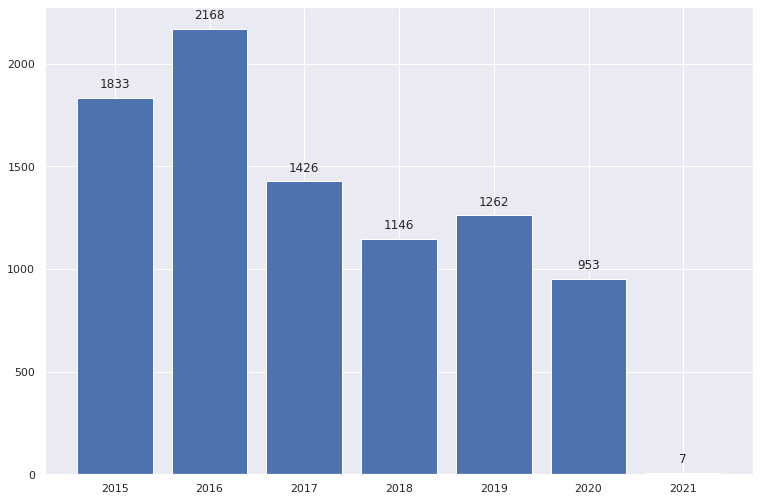

In [26]:
xs = tab10['index']
ys = tab10["counts"]
plt.bar(xs,ys)

# zip joins x and y coordinates in pairs
for x,y in zip(xs,ys):

    label = "{:.0f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

plt.show()

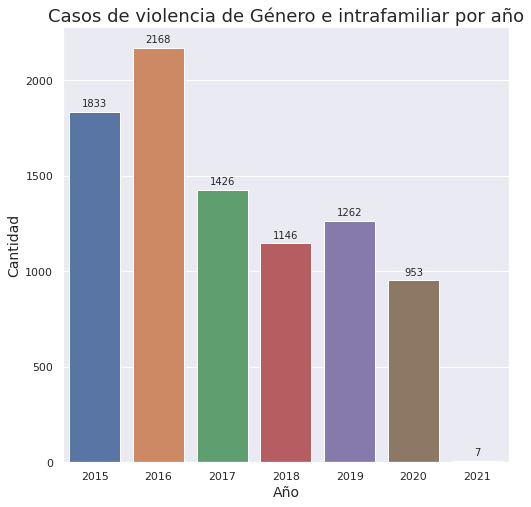

In [32]:
plt.figure(figsize=(8, 8)) 
plots = sns.barplot(x="index", y="counts", data=tab10) 
for bar in plots.patches: 
    
    plots.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,  
                    bar.get_height()), ha='center', va='center', 
                   size=10, xytext=(0, 8),
                   textcoords='offset points') 
  
plt.xlabel("Año", size=14) 
  
plt.ylabel("Cantidad", size=14) 
  
plt.title("Casos de violencia de Género e intrafamiliar por año", size = 18) 
  
plt.show()

## Abstracción 

**¿Qué?** : Datos temporales representados en forma de tabla.

* Año: Variable cualitativa, ordenada, y secuencial que representa el tiempo de la medición. Su rango va desde 2015 hasta 2021.
* Cantidad: Variable ordenada cuantitativa que indica el total de casos de violencia de Género e intrafamiliar discriminada por año. Su rango va desde 7 casos a 2168.

**¿Por qué?**: Se busca hallar y comparar la tendencia por año frente a la cantidad del  total de casos de violencia de Género e intrafamiliar.

**¿Cómo?**: Se realiza por medio de una codificación ordenada por año para poder comparar tendencias del total de casos de violencia de Género e intrafamiliar, para diferenciar los casos por año se usan los colores.

Select → Juxtapose → filter.

**Marcas y Canales:**

* Marca de línea sobre el total de casos de violencia de género e intrafamiliar por año.
* Canal de color para la variable cualitativa año.
* Canal de posición espacial vertical para la cantidad de casos de violencia de género e intrafamiliar por año.
* Canal de posición espacial horizontal para representar el año de ocurrencia de los casos de violencia de género e intrafamiliar.
* Canal de tamaño, longitud para la variable cualitativa año. 

**Qué tarea cumple:**

Evidenciar la cantidad de casos de violencia de género e intrafamiliar por año para la ciudad de Bucaramanga - Santander. Podemos ver que el año 2016 registró la mayor cantidad de casos de violencia con una total de 2.168, seguido del año 2015 con un total de  1.833 casos.



# **Modismo estático N° 2**

In [ ]:
tab2 = df_Genero['parentezco_vict_agrupada'].value_counts().rename_axis('label').reset_index(name='counts')

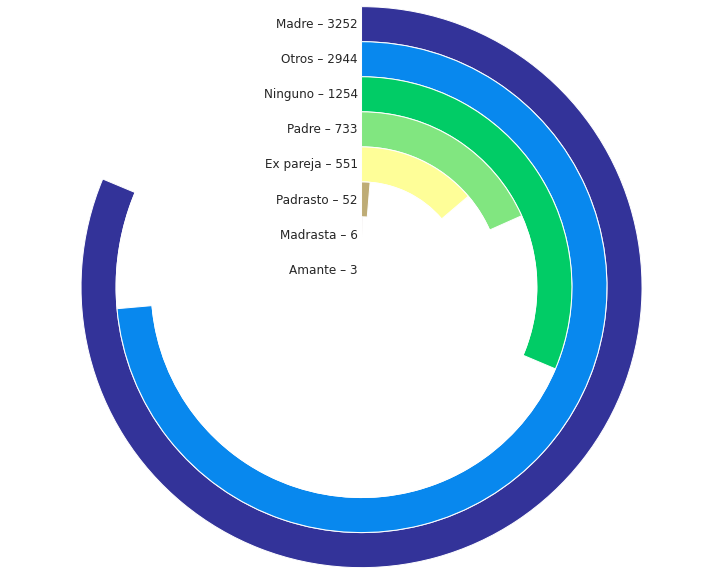

In [ ]:
from time import clock_getres
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10

labels = tab2['label']
data = tab2['counts']
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)


#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 


#create colors along a chosen colormap
#colors = ("crimson", "gold", "orange","chartreuse", "cyan","blueviolet","magenta","beige", "yellow","crimson", "gold", "orange")
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], 
                           data[i]], 
                          radius = r - i * w, 
                          startangle = 90, 
                          labels = ["", labels[i]], 
                          labeldistance = 1 - 1 / (1.5 * (n - i)), 
                          textprops = {"alpha": 0}, 
                          colors = ["white", colors[i]])
    plt.setp(innerring, 
             width = w, 
             edgecolor = "white")
    radius = r - i * w
    plt.text(0, radius - w / 2, f'{labels[i]} – {data[i]} ', ha='right', va='center')

#plt.legend()
plt.show()

## Abstracción 

***¿Qué?***

Datos categóricos representados en forma de tabla
* Parentesco: Variable categórica que representa el parentesco que tiene el agresor con la víctima. 
* Cantidad: Variable ordenada cuantitativa secuencial, que representa la cantidad de personas que pertenecen a la variable parentesco

***¿Por qué?*** Permite comparar tendencias e identificar atributos extremos.

***¿Cómo?*** Se realiza por medio de una codificación ordenada por cantidad de agresores según el parentesco que tengan con la víctima. 

Select → Juxtapose → filter.

***Marcas y canales:***

* Canal de color para la variable cantidad de agresores según el parentesco con la victima.
* Canal de posición espacial horizontal y vertical para la variable categórica parentesco.
* Canal de longitud para la variable cuantitativa cantidad.
Marca de línea para la variable cuantitativa cantidad. 
* Canal de tamaño, longitud, para la variable cantidad.

***Qué tarea cumple:***

Identificar la cantidad total de casos de violencia de género e intrafamiliar por el tipo de parentesco que tenía el agresor con la víctima.

Se evidencia que el tipo de parentesco  con mayor casos de violencia registrados es la madre de la víctima con un valor total de 3252 casos, se observa  también que el amante es quien registra la menor cantidad de casos de violencia con un total de 3 casos.


# **Modismo estático N°3**

In [ ]:
tab1 = pd.crosstab(df_Genero["def_naturaleza"],df_Genero["Ciclo de vida"])

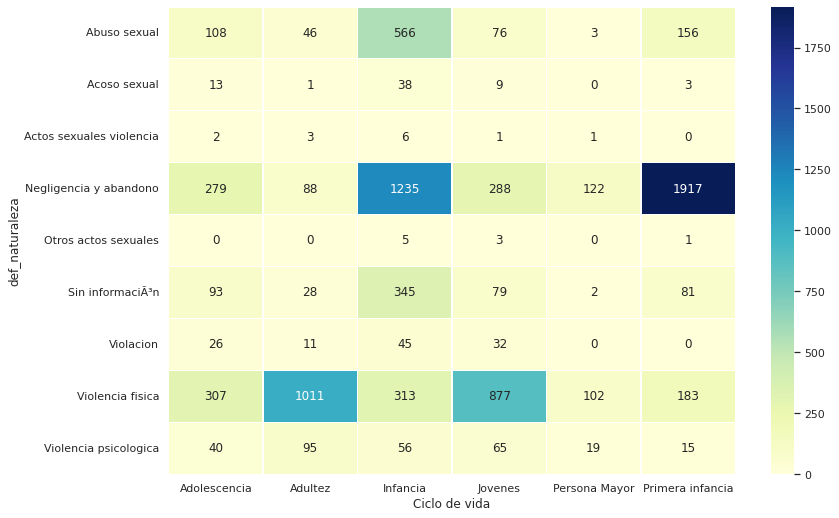

In [ ]:
ax = sns.heatmap(tab1,
                 annot=True, 
                 fmt="d",
                 linewidths=.5,
                 cmap="YlGnBu")

## Abstracción 

***¿Qué?*** : Datos categóricos representados en forma de tabla

* def_naturaleza: Variable categórica que representa cualquier acción o conducta de violencia desarrolladas a partir de relaciones de poder basadas en el género .
* Ciclo de vida: Variable categórica que representa la clasificación de la edad del paciente según el ministerio de salud y protección social.

***¿Por qué?***:  Permite analizar la relación numérica o distribución existente entre las variables categóricas def_naturaleza y ciclo de vida. Permite identificar datos atípicos.

***¿Cómo?***:  Se realiza por medio de un mapa por color según la variable categórica representada.

Map → Luminance .

***Marcas y canales:***

* Canal de color para representar la frecuencia de los casos  de violencia según su naturaleza y ciclo de vida de la víctima.
* Canal de posición espacial horizontal para representar la variable categórica ciclo de vida
* Canal de posición espacial vertical para representar la variable categórica def_naturaleza.
* Marca de área para representar la cantidad de casos de violencia según su naturaleza y ciclo de vida.

***Qué tarea cumple:***

Evidenciar el tipo de violencia según su naturaleza y ciclo de vida de la víctima.
Se observa que ocurre más violencia de género e intrafamiliar en la primera infancia por tipo de ciclo de vida de negligencia y abandono con un valor total de 1917 casos para la ciudad de Bucaramanga - Santander.

# **Modismo estático N°4**

In [33]:
tab9 = pd.crosstab(df_Genero["sexo_"],df_Genero["año"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea0974e410>,
      dtype=object)

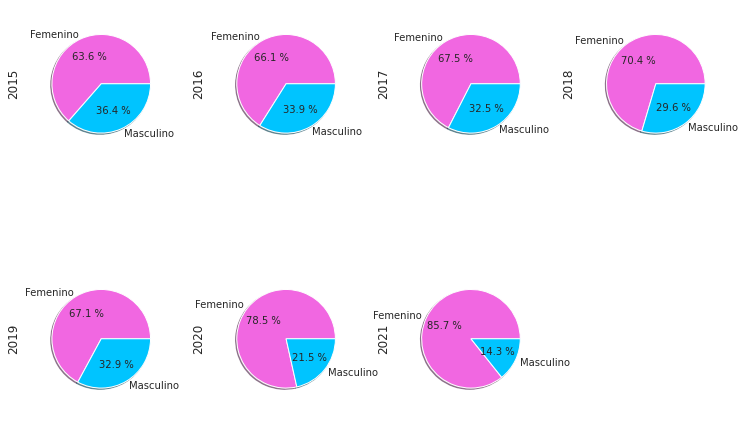

In [35]:
colores = ["#f167e1","#00c4ff"]
tab9.plot.pie(subplots = True,layout=(2,4), autopct="%0.1f %%", colors = colores,textprops={'size': 'smaller'},
                                          shadow=True, radius=0.8, legend = False)


## Abstracción 
***¿Qué?***

Datos cuantitativos representados en forma de tabla, discriminados por las  variables sexo y año.
* Año: variable cualitativa ordenada y secuencial que representa el tiempo en el que sucedieron los casos de violencia, tiene un rango de 2015 a 2021.
* Sexo: variable categórica que permite diferenciar la cantidad de casos de violencia según el género.
Porcentaje: variable ordenada cuantitativa que indica la cantidad porcentual  de casos  de violencia que se presenta por año en mujeres y hombres

***¿Por qué?*** Permite resumir y comparar similitudes y diferencias  entre la cantidad porcentual de los casos de violencia según el género.

***¿Cómo?***  Se procede a seleccionar la variable categorica sexo, se separa  por año de ocurrencia de los casos de violencia y se procede a sacar la cantidad porcentual.

Select → Partition/Juxtapose→ filter.

***Marcas y canales:*** 

* Canal de color para diferenciar la variable categórica sexo. 
* Marca de área para la variable cuantitativa porcentaje.
* Canal de posición espacial horizontal y vertical para la variable sexo y porcentaje.
* Canal de posición espacial vertical para la variable año.

**Qué tarea cumple:**

Representar la cantidad porcentual de casos de violencia  de género e intrafamiliar en la primera infancia por sexo y año. Se evidencia que los casos de maltrato por género son mayores en mujeres que en hombres, podemos observar que la mayor cantidad de violencia en mujeres se registra para el año 2021 con un total de 85.7 % de casos. Los hombres registran una tendencia a la baja en los casos de violencia a través del tiempo y su mayor cantidad de casos  fue registrado para el año 2015 con un 36.4% de los caso de violencia. 

